In [13]:
import pandas as pd

In [14]:
df1 = pd.read_csv('dataset1.csv')
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
df2 = pd.read_csv('dataset2.csv')
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
df1.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [17]:
df2.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Handle potential NaN values
df1.fillna(0, inplace = True) # Replace NaN with 0 or another suitable value
df2.fillna(0, inplace = True)

In [27]:
df1.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [28]:
df2.isna().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [29]:
# Function to evaluate classifier performance and create a heatmap
def evaluate_classifier(classifier, X, y, classifier_name):
# def is a Python keyword used to define a function.
# evaluate_classifier is the name of the function.
# The function takes four arguments:
#   classifier: The machine learning model (e.g., Decision Tree, Random Forest) you want to evaluate.
#   X: The input features of your dataset (often a pandas DataFrame).
#   y: The target variable or labels you're trying to predict.
#   classifier_name: A string representing the name of the classifier (for display purposes).

    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy')
    print(f"{classifier_name} Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    # KFold: This creates a strategy for splitting your data into 10 folds (groups) for cross-validation.
    #   n_splits=10: Divides the data into 10 folds.
    #   shuffle=True: Randomly shuffles the data before splitting.
    #   random_state=42: Sets a seed for reproducibility.
    # cross_val_score: This function applies the classifier to the data using the k-fold strategy,
    # calculates the model's accuracy for each fold, and stores the results in the scores variable.
    # print: This line displays the average accuracy and standard deviation of the
    # classifier's performance across all folds.

    try:
        numerical_cols = X.select_dtypes(include=['number']).columns
        if len(numerical_cols) > 0:
            plt.figure(figsize=(8, 6))
            sns.heatmap(X[numerical_cols].corr(), annot=True, cmap="coolwarm")
            plt.title(f"Heatmap for {classifier_name} (Numerical Features)")
            plt.show()
        else:
            print("No numerical features found for heatmap visualization.")
    except (ValueError, TypeError) as e:
        print(f"Heatmap visualization not possible for this data: {e}")
    # try...except: This block is used to handle potential errors during heatmap creation.
    # numerical_cols: This line identifies the columns in your dataset (X) that contain numerical data.
    # if len(numerical_cols) > 0:: If numerical features are found, the code proceeds to create the heatmap.
    # sns.heatmap: This function from the seaborn library generates the heatmap.
    #    X[numerical_cols].corr(): Calculates the correlation between numerical features.
    #    annot=True: Displays the correlation values on the heatmap.
    #    cmap="coolwarm": Sets the color scheme of the heatmap.
    # plt.title, plt.show: These lines set the title of the heatmap and display it.
    # If no numerical features are found or an error occurs, informative messages are printed.


In [30]:
# Dataset 1
try:
    X1 = df1.drop('Species', axis=1)
    y1 = df1['Species']
except KeyError:
    print("Error: 'Species' column not found in dataset1.csv. Please check your data.")
    exit()
# try:: This begins a try...except block. It's used for error handling. The code within the try
# block is executed, and if a KeyError occurs, the code within the except block is executed instead.
# X1 = df1.drop('Species', axis=1):
#   X1: This variable is assigned the features (input data) for the machine learning model.
#   df1: This is the Pandas DataFrame containing data loaded from dataset1.csv.
#   .drop('Species', axis=1): This line removes the column named 'Species' from the DataFrame df1.
#       'Species' is the name of the column to be dropped.
#        axis=1 specifies that we are dropping a column (axis=0 would drop a row).
#        The result (DataFrame without the 'Species' column) is assigned to X1.
# y1 = df1['Species']:
#    y1: This variable is assigned the target variable (what we want the model to predict).
#    df1['Species']: This selects the 'Species' column from the DataFrame df1. This column
#    likely contains the labels or categories you want to predict.
# except KeyError:: If a KeyError occurs during the execution of the try block (specifically,
# if the 'Species' column is not found in df1), the code inside the except block will be executed.
# A KeyError typically happens when you try to access a column that doesn't exist in a DataFrame.
# print("Error: 'Species' column not found in dataset1.csv. Please check your data."): This line prints
# an error message to the console, informing the user that the 'Species' column is missing and suggesting
# they check their data file.
# exit(): This line terminates the program's execution because if no tareget attribute in dataset how we predict


In [31]:
# Dataset 2
try:
    X2 = df2.drop('type', axis=1)
    y2 = df2['type']
except KeyError:
    print("Error: 'type' column not found in dataset2.csv. Please check your data.")
    exit()

# THis is the same code as the above just for dataset2 oe df2

Dataset 1:
Decision Tree Accuracy: 0.9933 (+/- 0.0400)


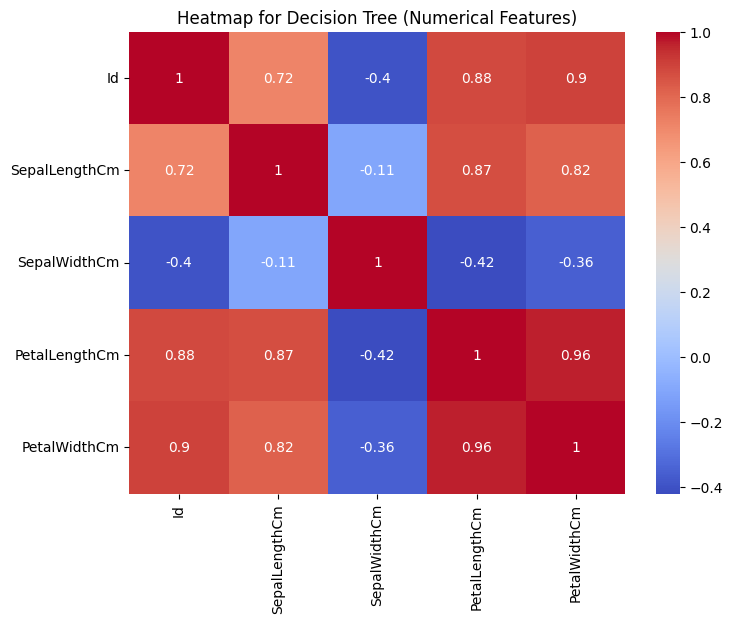


Dataset 2:
Decision Tree Accuracy: 0.9865 (+/- 0.0066)


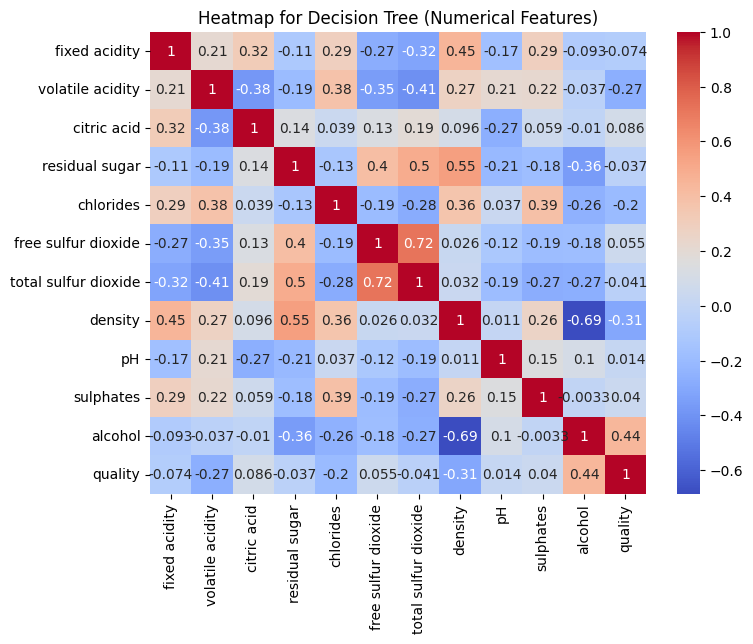

In [32]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_classifier = DecisionTreeClassifier(random_state=42): This line is where the
# Decision Tree model is created.
#     dt_classifier: This is a variable that will hold our Decision Tree model.
#       Think of it as a container for the model.
#     DecisionTreeClassifier(): This is the function from the sklearn.tree library
#       that actually creates the Decision Tree model.
#     random_state=42: This sets a seed for the random number generator used within
#       the Decision Tree algorithm. Setting a seed ensures that if you run the code
#       multiple times, you'll get the same results (which is important for reproducibility).

print("Dataset 1:")
evaluate_classifier(dt_classifier, X1, y1, "Decision Tree")
# This line calls the evaluate_classifier function (which was defined earlier in the code) to
# assess the performance of the Decision Tree model on the first dataset.
#     dt_classifier: The Decision Tree model we created.
#     X1: The features (input data) for the first dataset.
#     y1: The target variable (what we want to predict) for the first dataset.
#     "Decision Tree": A string representing the name of the classifier (used for display purposes).

print("\nDataset 2:")
evaluate_classifier(dt_classifier, X2, y2, "Decision Tree")
# Same with dataset2 or df2


Dataset 1 - Bagging (3 estimators):
Bagging (3) Accuracy: 0.9867 (+/- 0.0800)


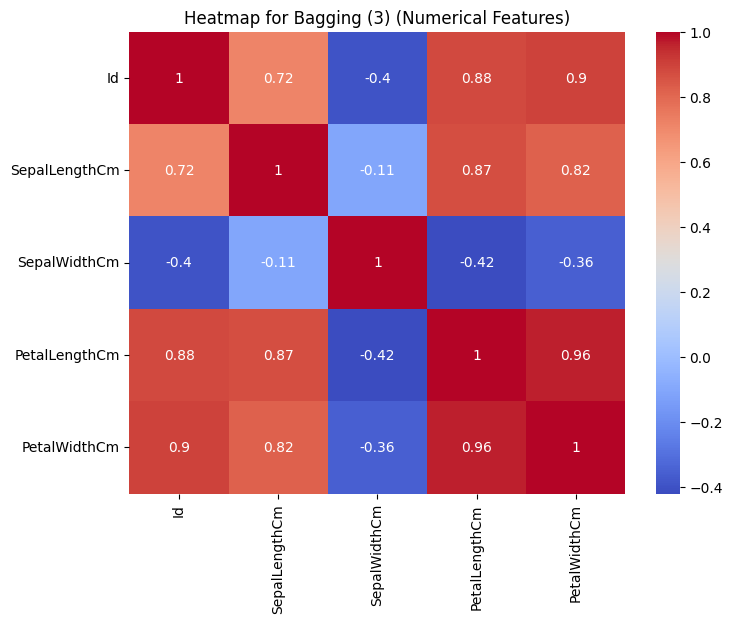


Dataset 2 - Bagging (3 estimators):
Bagging (3) Accuracy: 0.9875 (+/- 0.0082)


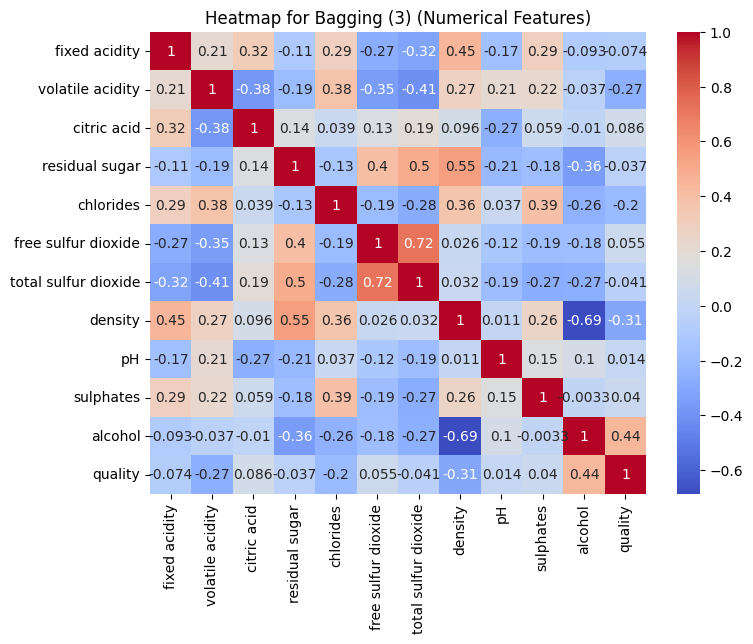


Dataset 1 - Bagging (5 estimators):
Bagging (5) Accuracy: 0.9933 (+/- 0.0400)


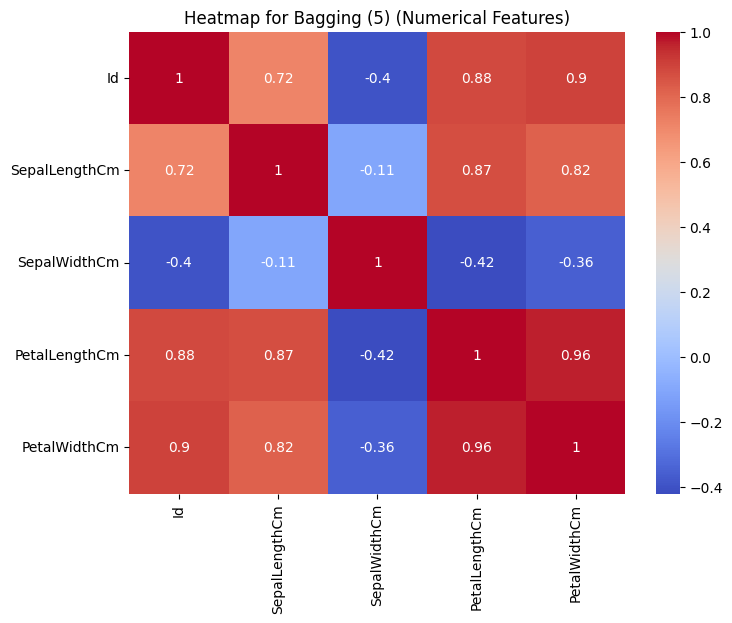


Dataset 2 - Bagging (5 estimators):
Bagging (5) Accuracy: 0.9897 (+/- 0.0074)


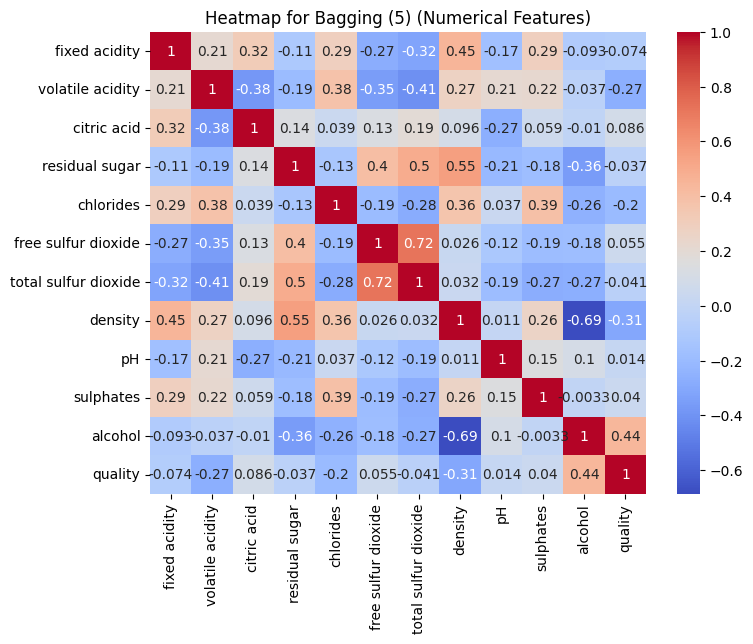


Dataset 1 - Bagging (7 estimators):
Bagging (7) Accuracy: 0.9933 (+/- 0.0400)


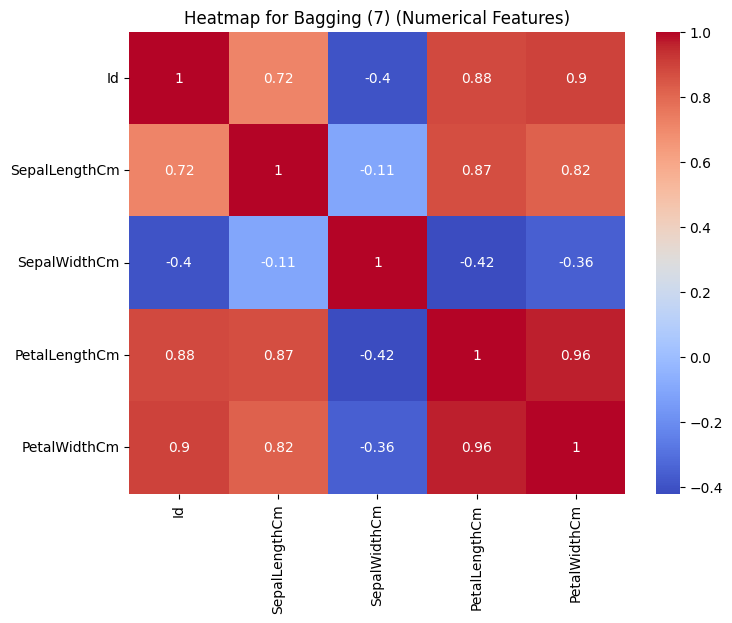


Dataset 2 - Bagging (7 estimators):
Bagging (7) Accuracy: 0.9900 (+/- 0.0055)


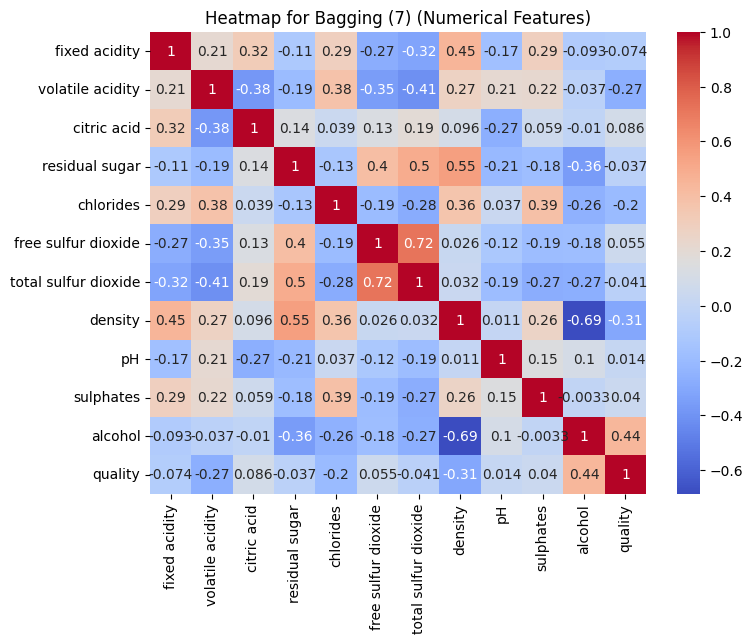


Dataset 1 - Bagging (9 estimators):
Bagging (9) Accuracy: 0.9933 (+/- 0.0400)


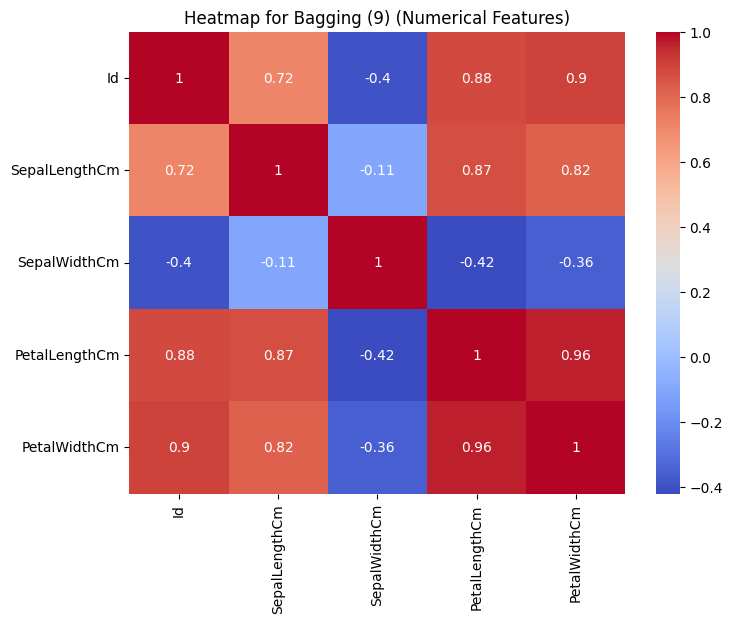


Dataset 2 - Bagging (9 estimators):
Bagging (9) Accuracy: 0.9912 (+/- 0.0062)


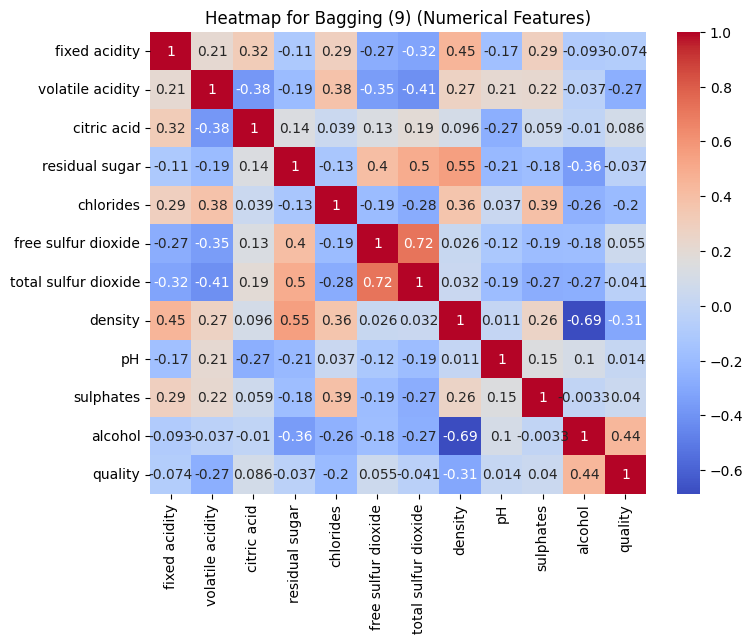


Dataset 1 - AdaBoost (3 estimators):
AdaBoost (3) Accuracy: 0.9867 (+/- 0.0800)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

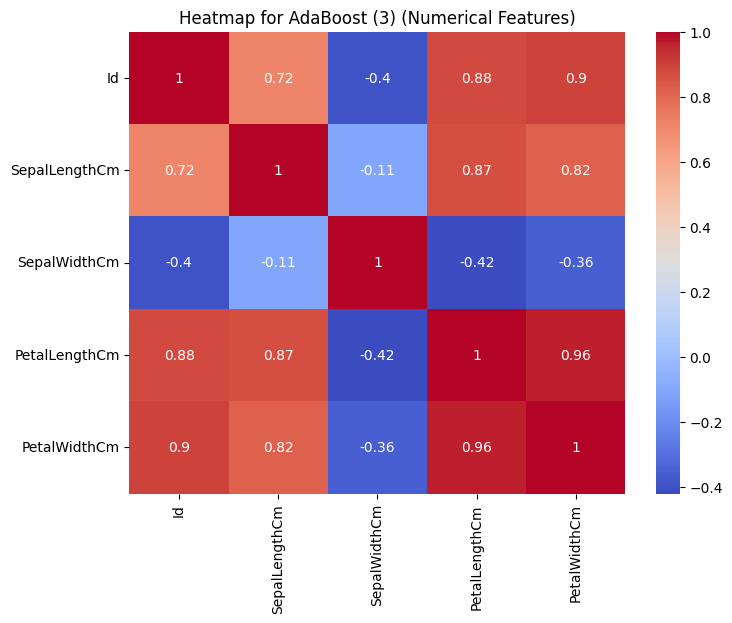


Dataset 2 - AdaBoost (3 estimators):


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost (3) Accuracy: 0.9888 (+/- 0.0099)


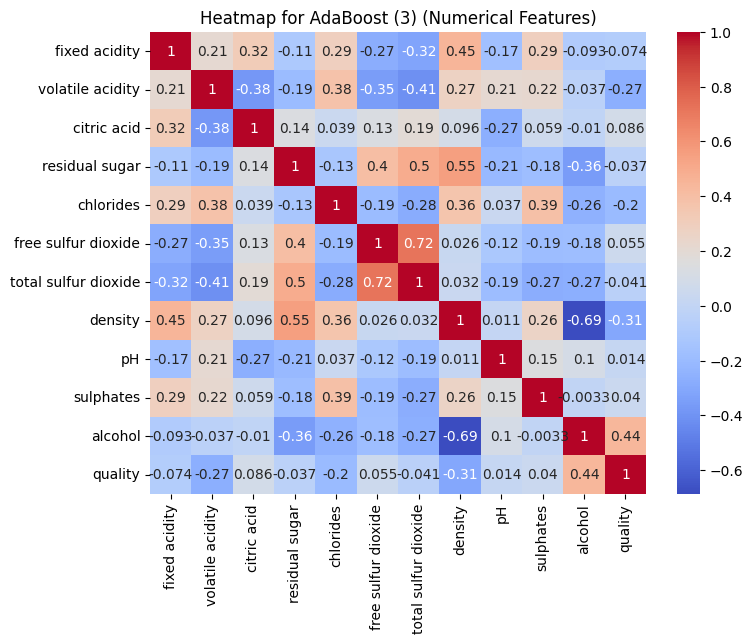


Dataset 1 - AdaBoost (5 estimators):
AdaBoost (5) Accuracy: 0.9867 (+/- 0.0800)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

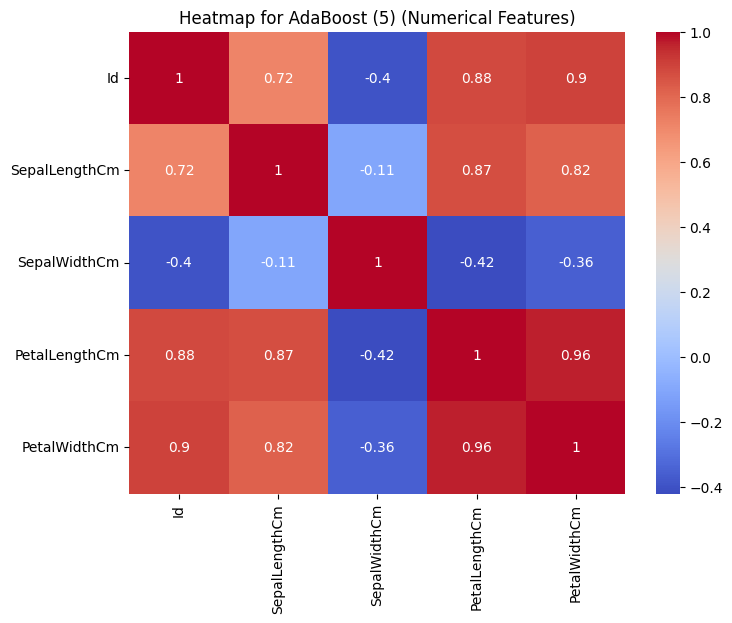


Dataset 2 - AdaBoost (5 estimators):


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost (5) Accuracy: 0.9882 (+/- 0.0097)


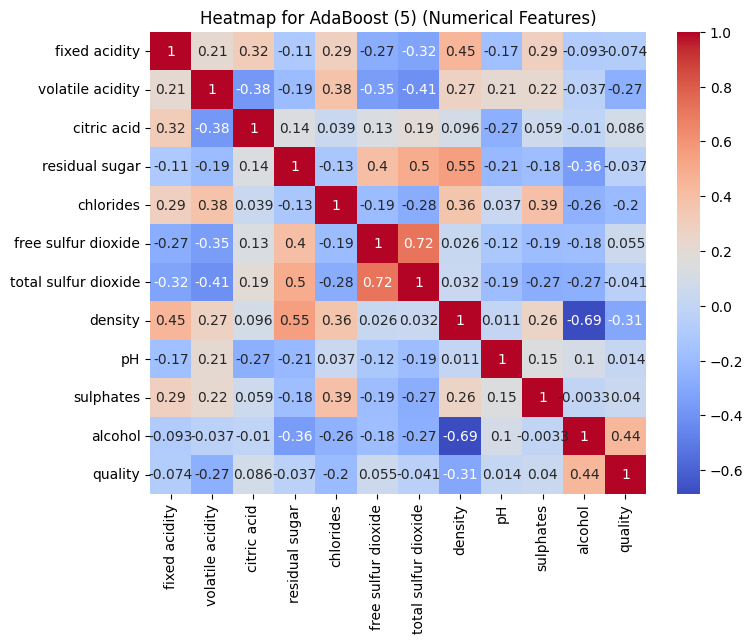


Dataset 1 - AdaBoost (7 estimators):


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost (7) Accuracy: 0.9867 (+/- 0.0800)


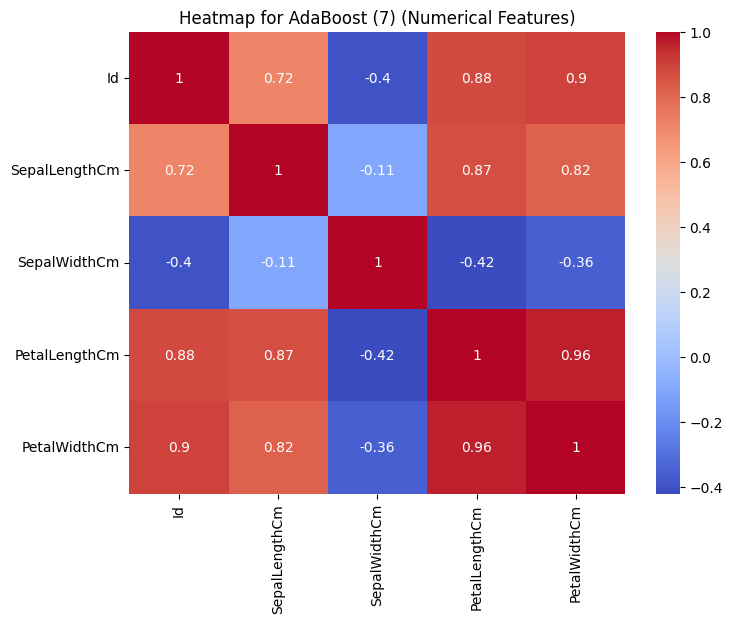


Dataset 2 - AdaBoost (7 estimators):


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost (7) Accuracy: 0.9886 (+/- 0.0105)


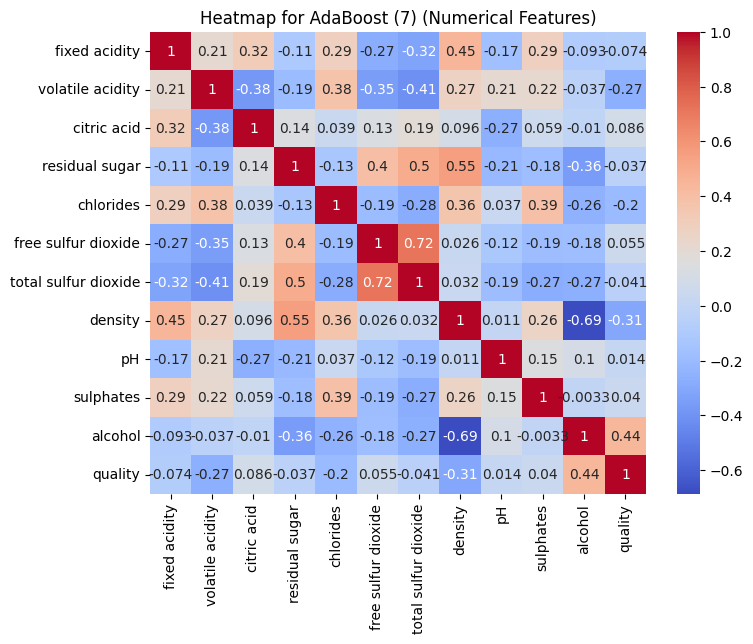


Dataset 1 - AdaBoost (9 estimators):
AdaBoost (9) Accuracy: 0.9867 (+/- 0.0800)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

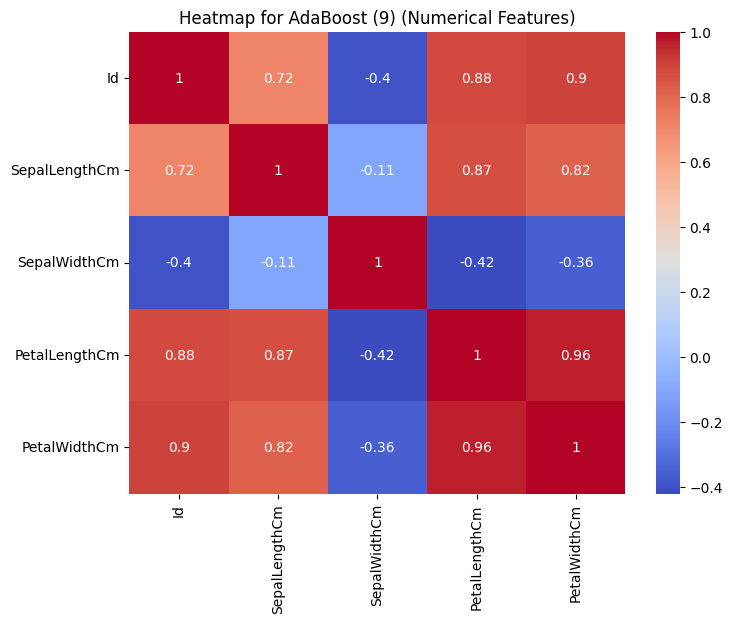


Dataset 2 - AdaBoost (9 estimators):


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost (9) Accuracy: 0.9883 (+/- 0.0113)


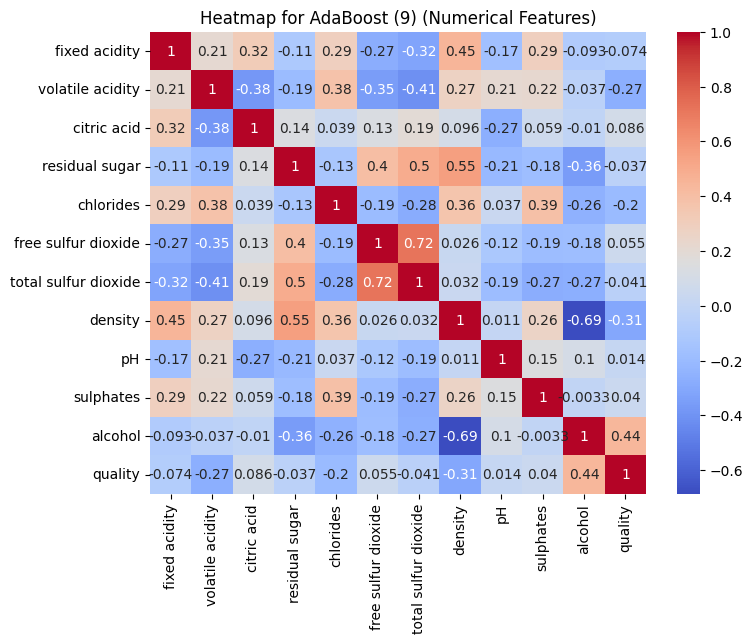

In [33]:
# Ensemble methods - Bagging and AdaBoost (combined loop for brevity)
for classifier_type in ["Bagging", "AdaBoost"]:
    for n_estimators in [3, 5, 7, 9]:
        if classifier_type == "Bagging":
            classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42)
        else:
            classifier = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42)

        print(f"\nDataset 1 - {classifier_type} ({n_estimators} estimators):")
        evaluate_classifier(classifier, X1, y1, f"{classifier_type} ({n_estimators})")

        print(f"\nDataset 2 - {classifier_type} ({n_estimators} estimators):")
        evaluate_classifier(classifier, X2, y2, f"{classifier_type} ({n_estimators})")
# Nested Loops:
#     The code uses two nested for loops to iterate through different configurations:
#         The outer loop (for classifier_type in ["Bagging", "AdaBoost"]) selects either "Bagging" or
#           "AdaBoost" as the ensemble method.
#         The inner loop (for n_estimators in [3, 5, 7, 9]) iterates through different numbers of
#           estimators (weak learners) to be used in the ensemble.

# Creating the Ensemble Classifiers:
#   Inside the loops, an if statement checks the classifier_type:
#     If it's "Bagging", a BaggingClassifier is created using BaggingClassifier(DecisionTreeClassifier(),
#       n_estimators=n_estimators, random_state=42).
#        This means it will create an ensemble of Decision Trees using the Bagging technique.
#        n_estimators controls the number of Decision Trees in the ensemble.
#        random_state=42 ensures consistent results.
#     If classifier_type is "AdaBoost", an AdaBoostClassifier is created using AdaBoostClassifier
#       (DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42).
#           This creates an ensemble of Decision Trees using the AdaBoost technique.
#           Similar to Bagging, n_estimators and random_state have the same roles.

# Evaluating the Classifiers:
#     After creating the classifier, the code calls the evaluate_classifier function
#       (defined earlier) to assess its performance on both datasets (X1, y1, X2, y2).
#     The results (accuracy and potentially a heatmap) are printed to the console.
